importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style="darkgrid",font_scale=1,color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
import warnings
warnings.filterwarnings("ignore")

Data collection & Analysis

In [ ]:
#loading data from csv file through pandas dataframe
df=pd.read_csv("/content/insurance dataset.csv")


In [ ]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.shape

(1337, 7)

In [ ]:
#Encoding the categorical features
dummies=pd.get_dummies(df.sex)
dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
merge = pd.concat([df,dummies],axis=1)
merge.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [ ]:
df1 = merge.drop(["sex","female"],axis=1)
df1.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [ ]:
dummi1=pd.get_dummies(df1.smoker)
dummi1.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
merge1=pd.concat([df1,dummi1],axis=1)
df2 = merge1.drop(["smoker","no"],axis=1)
df2.head()

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [ ]:
dummi2=pd.get_dummies(df2.region)
dummi2.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
merge2 = pd.concat([df2,dummi2],axis=1)
merge2.head()

,age,bmi,children,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,0,1,0,0,0,1
1,18,33.770,1,southeast,1725.55230,1,0,0,0,1,0
2,28,33.000,3,southeast,4449.46200,1,0,0,0,1,0
3,33,22.705,0,northwest,21984.47061,1,0,0,1,0,0
4,32,28.880,0,northwest,3866.85520,1,0,0,1,0,0


In [ ]:
df3 = merge2.drop(["region","northeast"],axis=1)
df3.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
df3.shape

(1337, 9)

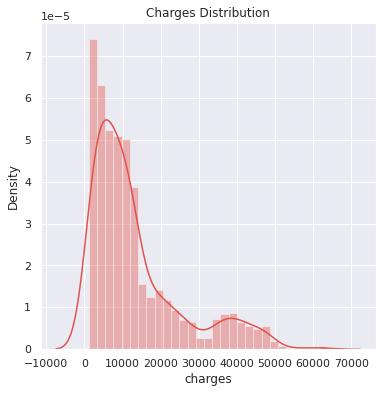

In [ ]:
#distribution of  charges value
plt.figure(figsize=(6,6))
sns.distplot(df["charges"])
plt.title("Charges Distribution")
plt.show()

In [ ]:
# Now ,we will see what is the r^2 before doing any operation on our dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(df3[["age",	"bmi",	"children",	"male",	"yes",	"northwest",		"southwest","southeast"]],df3["charges"],test_size=0.2,random_state=2)
new_model = LinearRegression()
new_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
new_pred=new_model.predict(X_test)

In [ ]:

from sklearn.metrics import r2_score
train1_score=new_model.score(X_train,y_train)
print("Train score:",train1_score)

Train score: 0.7589370334138595


In [ ]:
score=r2_score(y_test,new_pred)
print("r_2 score",score)

r_2 score 0.7148265354300392


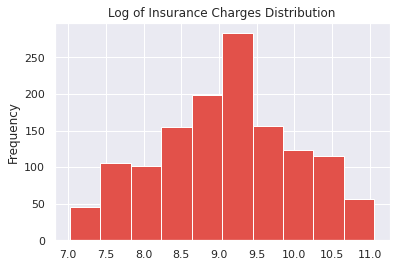

In [ ]:
df3['charges_log'] = np.log(df3['charges']) 
df3['charges_log'].plot(kind='hist', title= 'Log of Insurance Charges Distribution')

We will use the feature selection method by backward elimination.It is used to remove those features that do not have a significant effect on the dependent variable.
We need to select the significance level to stay in the model (SL=0.05)
Now we will remove all those predictor variable from our data which has high p value.

In [ ]:
target_name = "charges_log"
y = df3[target_name]
X = df3.drop(target_name,axis=1)


In [ ]:
#add a coloumn of 1s as integer type data
X1=np.append(arr=np.ones((1337,1)).astype(int),values=X,axis=1)

In [ ]:
#choose a significance level usually 0.05,if p>0.05
#for the highest values parameter,remove that value
X_opt = X1[:,[0,1,2,3,4,5,6,7,8]]
X_opt

array([[ 1.  , 19.  , 27.9 , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 18.  , 33.77, ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 28.  , 33.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 1.  , 18.  , 36.85, ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 21.  , 25.8 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 61.  , 29.07, ...,  1.  ,  1.  ,  0.  ]])

In [ ]:
import statsmodels.api as sm
ols = sm.OLS(endog=y,exog=X_opt).fit()

In [ ]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1348.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:55:27   Log-Likelihood:                -305.40
No. Observations:                1337   AIC:                             628.8
Df Residuals:                    1328   BIC:                             675.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6446      0.052    147.515      0.000       7.543       7.746
x1             0.0208      0.001     29.841      0.000       0.019       0.022
x2            -0.0052      0.002     -3.447      0.001      -0.008      -0.002
x3             0.0755      0.007     10.835      0.000       0.062       0.089
x4          5.367e-05   1.38e-06     38.932      0.000     5.1e-05    5.64e-05
x5            -0.0674      0.017     -4.022      0.000      -0.100      -0.035
x6             0.2755      0.039      7.080      0.000       0.199       0.352
x7            -0.0047      0.021     -0.228      0.820      -0.046       0.036
x8            -0.0617      0.021     -2.989      0.003      -0.102      -0.021
==============================================================================
Omnibus:                       54.239   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.164
Skew:                          -0.106   Prob(JB):                     1.50e-33
Kurtosis:                       4.633   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt1=X1[:,[0,1,2,3,4,5,6,8]]
X_opt1.shape

(1337, 8)

In [ ]:
#Removing the 7th coloumn (X7=southeast)from X1 as its highest p value is 0.820 building the ols model with the remaining features and check the most significant values.

In [ ]:
ols = sm.OLS(endog=y,exog=X_opt1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1542.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:55:27   Log-Likelihood:                -305.43
No. Observations:                1337   AIC:                             626.9
Df Residuals:                    1329   BIC:                             668.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6426      0.051    149.798      0.000       7.542       7.743
x1             0.0208      0.001     29.853      0.000       0.019       0.022
x2            -0.0052      0.002     -3.442      0.001      -0.008      -0.002
x3             0.0754      0.007     10.837      0.000       0.062       0.089
x4          5.366e-05   1.38e-06     38.945      0.000     5.1e-05    5.64e-05
x5            -0.0674      0.017     -4.022      0.000      -0.100      -0.035
x6             0.2757      0.039      7.087      0.000       0.199       0.352
x7            -0.0602      0.020     -3.080      0.002      -0.099      -0.022
==============================================================================
Omnibus:                       54.177   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.924
Skew:                          -0.106   Prob(JB):                     1.69e-33
Kurtosis:                       4.632   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model =smf.ols(formula=' charges ~age+	bmi+	children+	male+	yes+	northwest+		southwest', data= df3 )
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     569.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:15:04   Log-Likelihood:                -13540.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1329   BIC:                         2.714e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.203e+04    988.690    -12.165      0.0

In [ ]:
residuals = results.resid
fitted_value = results.fittedvalues
stand_resids = results.resid_pearson
influence = results.get_influence()
leverage = influence.hat_matrix_diag

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted Fitted')
  
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Sqrt(standardized residuals)')
ax[1, 1].set_title('Residuals vs Leverage Plot')
  
  
plt.tight_layout()
plt.show()
  
Now we have only those predictors whose p-value is less than 0.05 i.e effect on the dependent variable is significant.Now we will check all the assumptions of the linear regresssion model.

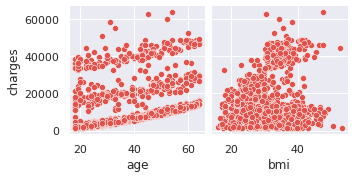

In [ ]:
#checking for linearity
p = sns.pairplot(df3,x_vars=["age","bmi"],y_vars="charges")

     feature       VIF
0        age  7.635587
1        bmi  8.788416
2   children  1.805850
3        yes  1.257454
4       male  2.001022
5  northwest  1.288817


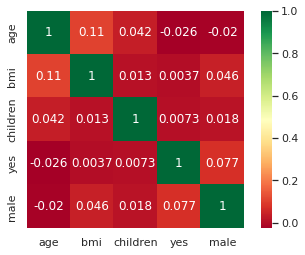

In [ ]:
#checking for multicollinearity
p=sns.heatmap(df3[["age","bmi","children","yes","male"]].corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df3[["age","bmi","children","yes","male","northwest"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [ ]:
#we can see that there doesn't exist any  significant correlation between the independent variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(df3[["age",	"bmi",	"children",	"male",	"yes",	"northwest",		"southwest"]],df3["charges_log"],test_size=0.2,random_state=0)
new_model = LinearRegression()
new_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#train score after applying backward elimination method
from sklearn.metrics import r2_score
train1_score=new_model.score(X_train,y_train)
print("Train score:",train1_score)

Train score: 0.7628308642362616


In [ ]:
new_pred=new_model.predict(X_test)

In [ ]:
score=r2_score(y_test,new_pred)
print("r_2 score",score)

r_2 score 0.7676427447191935


In [ ]:
#After applying backward elimination ,the accuracy is 76.76%

In [ ]:

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,new_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,new_pred))
print(" Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test,new_pred)))

Mean Absolute Error: 0.29691510696823814
Mean Squared Error: 0.20898580868346328
 Root Mean Squared Error: 0.5448991713778231


In [ ]:
#checking for mean of residuals
residuals = y_test.values-new_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.028615244103022096


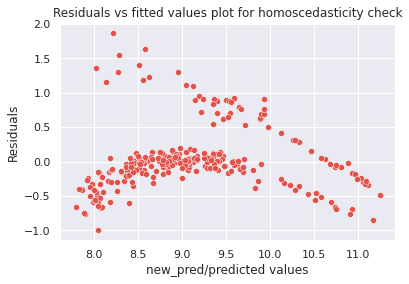

In [ ]:
p = sns.scatterplot(new_pred,residuals)
plt.xlabel('new_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Since there is a pattern ,heteroscedasticity is present in our data.
so ,we'll use weighted least square regression to avoid that.

In [ ]:
wls_model = sm.WLS(df3["charges_log"],df3[["age",	"bmi",	"children",	"male",	"yes",	"northwest",		"southwest"]])
results = wls_model.fit()
print(results.summary())

                                 WLS Regression Results                                
Dep. Variable:            charges_log   R-squared (uncentered):                   0.981
Model:                            WLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              9815.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:55:29   Log-Likelihood:                         -2206.5
No. Observations:                1337   AIC:                                      4427.
Df Residuals:                    1330   BIC:                                      4463.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
wls_pred=results.predict(X_test)

In [ ]:
residuals_wls = y_test.values-wls_pred
mean_residuals = np.mean(residuals_wls)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.2973490158143454


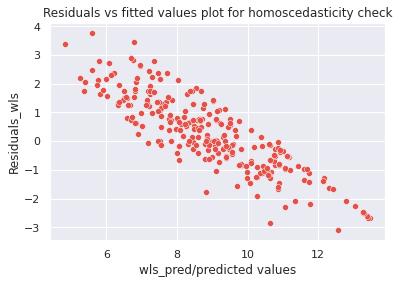

In [ ]:
p = sns.scatterplot(wls_pred,residuals_wls)
plt.xlabel('wls_pred/predicted values')
plt.ylabel('Residuals_wls')

p = sns.lineplot(color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Here we can see there is no such pattern in the graph of residuals,so they are homoscedastic.

In [ ]:
The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical model or regression analysis. The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample. Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation.
Here from the ols summary, we can see the value of the dw statistics is 2.088.Hence we can say there is no autocorrelation in the data.